In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_seeds = pd.read_csv('/content/seeds_data.csv')

# Separating the features(all columns except the last one since it has the labels) from the target variable
X = df_seeds.iloc[:, :-1]

# Initializing a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to feature data X and then transform X
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Original features:")
print(X.head())
print("\nScaled features:")
print(X_scaled.head())


Original features:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7
0      15.26      14.84     0.8710      5.763      3.312      2.221      5.220
1      14.88      14.57     0.8811      5.554      3.333      1.018      4.956
2      14.29      14.09     0.9050      5.291      3.337      2.699      4.825
3      13.84      13.94     0.8955      5.324      3.379      2.259      4.805
4      16.14      14.99     0.9034      5.658      3.562      1.355      5.175

Scaled features:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7
0   0.142098   0.215462   0.000061   0.304218   0.141702  -0.986152  -0.383577
1   0.011188   0.008224   0.428515  -0.168625   0.197432  -1.788166  -0.922013
2  -0.192067  -0.360201   1.442383  -0.763637   0.208048  -0.667479  -1.189192
3  -0.347091  -0.475333   1.039381  -0.688978   0.319508  -0.960818  -1.229983
4   0.445257   0.330595   1.374509   0.066666   0.805159  -1.563495  -0.475356


## Implementing K-means


In [6]:
import numpy as np

class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        # Randomly select n_clusters data points as initial centroids
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

    def _assign_clusters(self, X):
        # Calculating Euclidean distance from each data point to every centroid
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        # Assign each data point to the cluster of the closest centroid
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            # Get all points assigned to the current cluster
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                # Recalculate the centroid as the mean of these points
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
            else:
                # If a cluster is empty, keep its old centroid or reinitialize
                new_centroids[i] = self.centroids[i] # Keeping old centroid for simplicity
        return new_centroids

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X # Ensure X is a numpy array

        self._initialize_centroids(X_np)

        for i in range(self.max_iter):
            old_centroids = np.copy(self.centroids)

            # Assignment step
            self.labels = self._assign_clusters(X_np)

            # Update step
            self.centroids = self._update_centroids(X_np, self.labels)

            # Checking for convergence
            if np.allclose(old_centroids, self.centroids):
                print(f"K-means converged after {i+1} iterations.")
                break
        else:
            print(f"K-means did not converge after {self.max_iter} iterations.")

        return self.centroids, self.labels

## Finding Optimal Number of Clusters using Elbow method


K-means converged after 2 iterations.
K-means converged after 10 iterations.
K-means converged after 5 iterations.
K-means converged after 12 iterations.
K-means converged after 14 iterations.
K-means converged after 8 iterations.
K-means converged after 17 iterations.
K-means converged after 19 iterations.
K-means converged after 14 iterations.
K-means converged after 8 iterations.


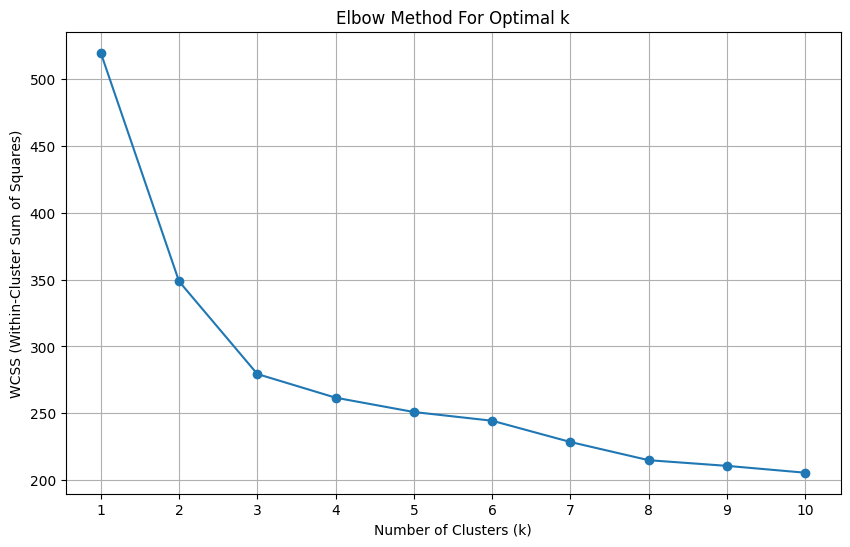

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans_model = KMeansScratch(n_clusters=k, random_state=42)
    centroids, labels = kmeans_model.fit(X_scaled)

    current_wcss = 0
    if k == 1:
        # When k=1, the centroid is the mean of all points
        cluster_mean = np.mean(X_scaled.to_numpy(), axis=0)
        current_wcss = np.sum(np.sqrt(np.sum((X_scaled.to_numpy() - cluster_mean)**2, axis=1)))
    else:
        for i in range(k):
            points_in_cluster = X_scaled.to_numpy()[labels == i]
            if len(points_in_cluster) > 0:
                current_wcss += np.sum(np.sqrt(np.sum((points_in_cluster - centroids[i])**2, axis=1)))
    wcss.append(current_wcss)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

K-means converged after 10 iterations.
K-means converged after 5 iterations.
K-means converged after 12 iterations.
K-means converged after 14 iterations.
K-means converged after 8 iterations.
K-means converged after 17 iterations.
K-means converged after 19 iterations.
K-means converged after 14 iterations.
K-means converged after 8 iterations.


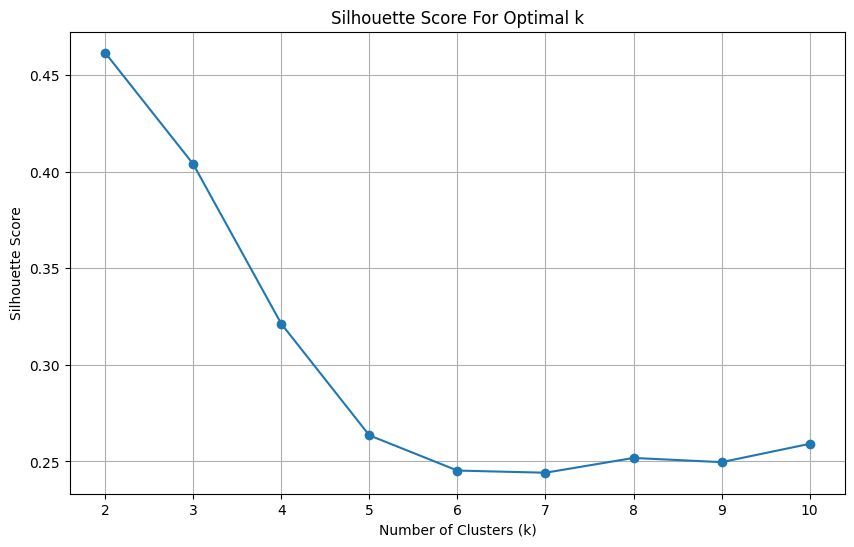

In [8]:
silhouette_scores = []
k_range_silhouette = range(2, 11) # Because silhouette score not defined for k=1

for k in k_range_silhouette:
    kmeans_model = KMeansScratch(n_clusters=k, random_state=42)
    centroids, labels = kmeans_model.fit(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

### Determining Optimal K

**Elbow Method Analysis:**
Looking at the Elbow method plot, we observe that the WCSS decreases as the number of clusters(k) increases. A distinct elbow appears around k=3. After this point, the decrease in WCSS is lesser.

**Silhouette Score Analysis:**
The Silhouette Score plot shows how well samples are clustered with respect toother clusters. A higher silhouette score indicates better-defined clusters. From the plot, the highest Silhouette Score is observed at k=2. However, the score at k=3 is also reasonably high and we choose it over k=2 considering the elbow method.


In [9]:
import numpy as np

# Initialize optimal k=3
k_optimal = 3
kmeans_optimal = KMeansScratch(n_clusters=k_optimal, random_state=42)

# Fitting the model to the scaled data
optimal_centroids, optimal_labels = kmeans_optimal.fit(X_scaled)

print(f"K-means clustering completed with k={k_optimal}.")
print(f"Shape of optimal_centroids: {optimal_centroids.shape}")
print(f"Shape of optimal_labels: {optimal_labels.shape}")

K-means converged after 5 iterations.
K-means clustering completed with k=3.
Shape of optimal_centroids: (3, 7)
Shape of optimal_labels: (210,)


## We unscale the centroids to better know how each cluster compares to another

In [10]:
import pandas as pd

# Inverse transform the optimal_centroids to get them back to original scale
unscaled_centroids = scaler.inverse_transform(optimal_centroids)

# Creating a DataFrame from the unscaled centroids
centroids_df = pd.DataFrame(unscaled_centroids, columns=X.columns)

print("Unscaled Cluster Centers:")
print(centroids_df)

Unscaled Cluster Centers:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7
0  14.286438  14.264932   0.880912   5.486904   3.243562   2.667236   5.087548
1  11.837206  13.241618   0.847613   5.233426   2.842544   4.880338   5.115235
2  18.407826  16.169275   0.883557   6.167754   3.684551   3.630014   6.035768


### Feature Representation

The dataset contains 7 features, which we assume describe physical properties of seeds:

*   **Feature_1:** Area A
*   **Feature_2:** Perimeter P
*   **Feature_3:** Compactness C
*   **Feature_4:** Length of kernel
*   **Feature_5:** Width of kernel
*   **Feature_6:** Asymmetry coefficient
*   **Feature_7:** Length of kernel groove

## Visualizing Clusters with Principal Component Analysis


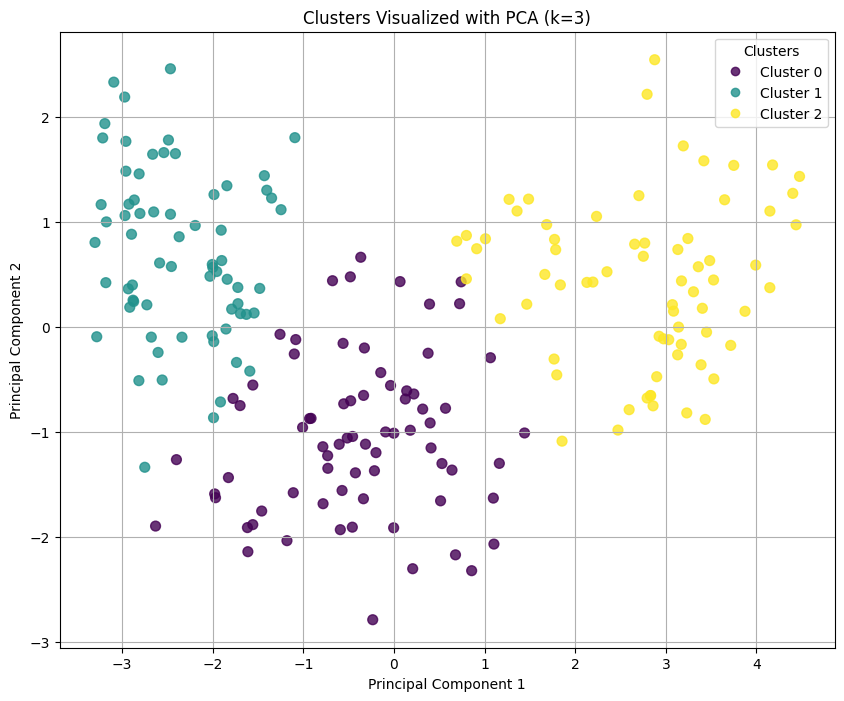

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing dimensionality to 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled data and transform it to 2D
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

# Color the points according to their optimal_labels
# Since optimal_labels is a numpy array of integers, we can directly use it for coloring
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=optimal_labels, cmap='viridis', s=50, alpha=0.8)

legend_labels = [f'Cluster {i}' for i in range(k_optimal)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Clusters Visualized with PCA (k={k_optimal})')
plt.grid(True)
plt.show()

 *   Cluster 0: Average size, average compactness, relatively low asymmetry.
 *   Cluster 1: Smallest seeds, lowest compactness, the highest asymmetry coefficient.
 *   Cluster 2: Largest seeds, highest compactness, and moderate asymmetry.



In [12]:
from sklearn.metrics import adjusted_rand_score

# The last column of `df_seeds` contains the true labels
true_labels = df_seeds.iloc[:, -1].values

# Calculating the Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, optimal_labels)

print(f"Adjusted Rand Index: {ari_score:.4f}")

# Even though true labels are 1-indexed (1, 2, 3), and our optimal_labels are 0-indexed (0, 1, 2),
# the ARI is still be valid as it measures similarity, not exact label matching.

Adjusted Rand Index: 0.8227
